<a href="https://colab.research.google.com/github/ProfKaromo/Data_Science_Codes/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://docs.tweepy.org/en/stable/
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


def get_tweets(query, count):
        '''
        Main function to fetch tweets and parse them.
        '''
        tweets = []
        # call twitter api to fetch tweets
        # consumer_key = 'L6Of6zefLv5mpKaBHDV0NDvcc'
        # consumer_secret = '3uRcoYoVP0YPi26RXJ3UOj4aSQLr6VCbeRcTWMOAxbnHV4gCwR'
        # access_token = '297976287-gS57FevcLTRkbtIjd88YpPi9f3LnrscPh4ErYZzX'
        # access_token_secret = 'q9V1RjR1A6iZaLA3s6qWX4sLV87DkouMPk89QlFLscvxu'

        
        consumer_key = 'OPbn9IwgI3lDY2k69c5Fpxwll'
        consumer_secret = 'pxqJup6g9spj6mqVJbzJEDvZ7R1hnpPrSDkqUK0dF790O9Vse1'
        access_token = '297976287-Hq3f0ligYw3qcQi8UWx5rSPlkL6rfOUqdvvtnBPH'
        access_token_secret = 'vQOLGPY258U9ZOKwvVR9v2fwDs8P2LGWjaMjpvhTDcsgT'

        # attempt authentication
        # create OAuthHandler object
        auth = OAuthHandler(consumer_key, consumer_secret)
        # set access token and secret
        auth.set_access_token(access_token, access_token_secret)
        # create tweepy API object to fetch tweets
        api = tweepy.API(auth, wait_on_rate_limit=True)
        #fetched_tweets = api.search_30_day(q = query, count = count, fromDate="202011100000", toDate="202211300000", label = "Cool")
        fetched_tweets = tweepy.Cursor(api.search, q=query).items(count)
        #fetched_tweets = api.user_timeline(screen_name=query)
        # parsing tweets one by one
        for tweet in fetched_tweets:
            # empty dictionary to store required params of a tweet
            parsed_tweet = {}

            # saving text of tweet
            parsed_tweet['text'] = tweet.text
            # saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text)

            # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                    tweets.append(parsed_tweet)
            else:
                tweets.append(parsed_tweet)

        # return parsed tweets
        return tweets

In [3]:

# calling function to get tweets
tweets = get_tweets(query = '#ArgentinaVsCroatia', count = 500)
# for tweet in tweets[:200]:
#     print(tweet['text'])
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
    ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

# printing first 50 positive tweets
positive = []
print("\n\nPositive tweets:")
for tweet in ptweets[:50]:
    positive.append(tweet['text'])
    print(tweet['text'])

# printing first 50 negative tweets
negative = []
print("\n\nNegative tweets:")
for tweet in ntweets[:50]:
    negative.append(tweet['text'])
    print(tweet['text'])

Positive tweets percentage: 20.906801007556677 %
Negative tweets percentage: 5.037783375314861 %
Neutral tweets percentage: 74.05541561712846 %     


Positive tweets:
Passing ball to Luke modric is more safer than saving your money into the bank account. #ArgentinaVsCroatia https://t.co/JM0mxE3Kew
RT @AmirKhanShinw13: Two-day Peace Fair 2022 organized at University of Peshawar
Provincial Minister for Sports, Information Technology and…
“Attack wins you games, defence wins you titles.”

@ShubhamJatalNcp आजचा सामना यावरच असेल..!
#ArgentinaVsCroatia 
#मराठीफुटबॉल
RT @polysportsio: It's Quiz Time!! 💬

Can you give the right answer? 🤔

Make your team now and comment below the your answer👇🏻

Download th…
Lo del laurel es real
Ademas el laurel esta representado en uno de nuestros simbolos patrio al escudo.
Y el himno d… https://t.co/kn9TPTpLUr
RT @Muhammadbilalyz: PEACE is not the highest goal in life. it is the most fundamental requirement.#PeaceFair_UOP #ArgentinaVsCroatia https…
The battl

Word Cloud Saved Successfully


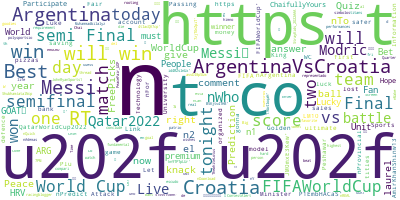

In [4]:
#Function to Create Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

create_wordcloud(positive)

In [5]:
#Function to ngram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_gram(corpus,ngram_range,n=None):
  vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [6]:
#n3_bigram positive
n2_bigrams = get_top_n_gram(positive,(3,3),10)
n2_bigrams

[('win semi final', 3),
 ('freepicks worldcup semifinal', 2),
 ('worldcup semifinal argentinavscroatia', 2),
 ('semifinal argentinavscroatia premium', 2),
 ('argentinavscroatia premium unit', 2),
 ('premium unit best', 2),
 ('unit best bet', 2),
 ('croatia win semi', 2),
 ('semi final match', 2),
 ('final match qatarworldcup2022', 2)]